In [64]:
import pandas as pd
pd.options.display.width = 0
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.simplefilter('ignore')
dire = {'up': 1,'down': -1, 'nan':0,'data':0,'none':3,'both':2,'flat':4} #none= narrow sideways, both=wide sideways
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr_percent(df, n=14):
    data = df.copy()
    high = data.High
    low = data.Low
    close = data.Close
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)/close.shift()
    atr = wwma(tr, n)
    return atr

pd.options.display.float_format = '{:,.3f}'.format


In [65]:
ret=pd.DataFrame()
n=0
f=1
inputs= {}
#for f in range(1,14):
inputs = pd.read_excel('hs20210217-74fut-3y.xls',sheet_name=None)#load multiple sheets in a dict
#    inputs.update(tinputs)
symbols1 = list(inputs.keys())
#[plt.plot(folio1[x]['Close'][:60]) for x in symbols]
print(symbols1)

['AD', 'BP', 'BZ', 'CC', 'CD', 'CL', 'CT', 'DJIA', 'DUX', 'DX', 'E7', 'EC', 'ED', 'ES', 'ET', 'FC', 'FCE', 'FDAX', 'FESX', 'FGBL', 'FV', 'GC', 'HG', 'HHA', 'HO', 'IXI', 'J7', 'JY', 'KC', 'KW', 'LB', 'LC', 'LH', 'LZ', 'MP', 'NG', 'NK', 'NM', 'NQ', 'NZD', 'OEX', 'OJ', 'PA', 'PL', 'QG', 'QI', 'QM', 'QO', 'RB', 'RS', 'RX', 'SB', 'SF', 'SI', 'SP', 'TF', 'TU', 'TY', 'UD', 'VIX', 'VSY00', 'YC', 'YK', 'YM', 'YR', 'YW', 'ZB', 'ZC', 'ZL', 'ZM', 'ZO', 'ZR', 'ZS', 'ZW']


In [66]:
#print(symbols1)
#tinputs
symbols1 = ['ES','TF']
print(list(inputs['ES'].keys()))
(inputs['ES'])

['Date', 'sDiff', 'mDiff', 'lDiff', 'Open', 'High', 'Low', 'Close', 'pHigh', 'pLow', 'Volume', 'NI', 'Short Term Crossover', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Medium Term Crossover', 'Unnamed: 17', 'Long Term Crossover', 'Unnamed: 19', 'Triple Cross', 'Unnamed: 21', 'Unnamed: 22']


,Date,sDiff,mDiff,lDiff,Open,High,Low,Close,pHigh,pLow,Volume,NI,Short Term Crossover,Unnamed: 13,Unnamed: 14,Unnamed: 15,Medium Term Crossover,Unnamed: 17,Long Term Crossover,Unnamed: 19,Triple Cross,Unnamed: 21,Unnamed: 22
0,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,Short Trend PMA,Short Trend AMA,PMA ROC%,AMA ROC%,Medium PMA,Medium AMA,Long PMA,Long AMA,Short,Medium,Long
1,2021-02-16,12.013,33.606,67.426,"3,936.500","3,959.250","3,918.750","3,927.750","3,956.994","3,906.345","1,422,732.000",up,"3,927.863","3,915.850",0.128,0.101,"3,920.981","3,887.375","3,914.809","3,847.383","3,923.959","3,899.644","3,861.299"
2,2021-02-12,10.946,40.144,60.257,"3,905.250","3,936.250","3,890.250","3,931.000","3,945.420","3,913.141","993,504.000",up,"3,922.846","3,911.900",0.359,0.260,"3,911.319","3,871.175","3,902.357","3,842.100","3,917.504","3,889.398","3,851.356"
3,2021-02-11,7.076,53.732,55.934,"3,907.000","3,920.500","3,884.500","3,912.000","3,928.675","3,892.829","1,296,054.000",up,"3,908.826","3,901.750",0.121,0.244,"3,902.332","3,848.600","3,891.584","3,835.650","3,905.226","3,879.210","3,842.051"
4,2021-02-10,11.866,62.739,55.120,"3,912.250","3,928.500","3,878.250","3,903.000","3,925.774","3,887.527","1,560,824.000",up,"3,904.116","3,892.250",0.068,0.410,"3,898.064","3,835.325","3,886.370","3,831.250","3,899.263","3,870.801","3,834.644"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2018-02-26,39.830,37.151,52.050,"2,741.250","2,775.750","2,732.250","2,774.250","2,792.630","2,763.567","1,256,268.000",up,"2,761.080","2,721.250",1.154,0.365,"2,740.951","2,703.800","2,730.016","2,677.967","2,749.766","2,723.674","2,724.597"
752,2018-02-23,18.241,33.197,37.973,"2,702.500","2,740.000","2,699.750","2,738.500","2,764.669","2,728.720","1,290,261.000",up,"2,729.592","2,711.350",1.064,0.109,"2,720.447","2,687.250","2,714.089","2,676.117","2,722.676","2,709.933","2,719.271"
753,2018-02-22,-7.552,32.329,21.196,"2,688.250","2,720.750","2,671.750","2,701.250","2,732.244","2,673.659","1,623,017.000",down,"2,700.848","2,708.400",0.114,0.107,"2,704.054","2,671.725","2,702.229","2,681.033","2,701.471","2,699.976","2,716.369"
754,2018-02-21,-7.741,35.620,11.263,"2,704.250","2,737.500","2,683.250","2,688.500","2,713.473","2,668.736","1,661,308.000",down,"2,697.759","2,705.500",-0.554,0.274,"2,703.020","2,667.400","2,699.913","2,688.650","2,700.579","2,698.230","2,717.333"


In [67]:
folio1 = {}
for e in symbols1:
    #i = pd.DataFrame()
    #i = inputs[e][['Date']]#pd.to_datetime(inputs[e]['Date']).copy()
    i = inputs[e][['Date','sDiff', 'mDiff', 'lDiff', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
    i['pHigh'] = inputs[e]['pHigh'].shift(-1)
    i['pLow']  = inputs[e]['pLow'].shift(-1)
    i['nni'] = [dire[str(item)] for item in inputs[e]['NI']] 
    source = ['Short Term Crossover', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Medium Term Crossover', 'Unnamed: 17', 'Long Term Crossover', 'Unnamed: 19', 'Triple Cross', 'Unnamed: 21', 'Unnamed: 22']
    #i = pd.concat([i, inputs[source]], axis=1)
    dtarget = {'Short Term Crossover':'sTrendPMA', 'Unnamed: 13':'sTrendAMA', 'Unnamed: 14':'sTrendPMAROC', 'Unnamed: 15':'sTrendAMAROC', 'Medium Term Crossover':'mTermPMA', 'Unnamed: 17':'mTermAMA', 'Long Term Crossover':'lTermPMA', 'Unnamed: 19':'lTermAMA', 'Triple Cross':'sTripleX', 'Unnamed: 21':'mTripleX', 'Unnamed: 22':'lTripleX'}
    i = pd.concat([i, inputs[e][source].rename(columns=dtarget)],axis=1)
    #print(list(i.keys()))
    i.drop(i.index[0])
    i = i.sort_values('Date',ascending=True)
    i = i.reset_index(drop=True)
    i['Date'] = pd.to_datetime(i['Date'])
    i.fillna(0)
    i['atrpct'] = atr_percent(i)
    folio1[e]=i
print(list(i.keys()))
print(len(folio1))
#plt.figure(figsize=(20,10))
#plt.plot(ret)
#plt.legend(symbols1,loc='upper left')
#plt.show()
i.head(3)

['Date', 'sDiff', 'mDiff', 'lDiff', 'Open', 'High', 'Low', 'Close', 'Volume', 'pHigh', 'pLow', 'nni', 'sTrendPMA', 'sTrendAMA', 'sTrendPMAROC', 'sTrendAMAROC', 'mTermPMA', 'mTermAMA', 'lTermPMA', 'lTermAMA', 'sTripleX', 'mTripleX', 'lTripleX', 'atrpct']
2


,Date,sDiff,mDiff,lDiff,Open,High,Low,Close,Volume,pHigh,pLow,nni,sTrendPMA,sTrendAMA,sTrendPMAROC,sTrendAMAROC,mTermPMA,mTermAMA,lTermPMA,lTermAMA,sTripleX,mTripleX,lTripleX,atrpct
0,2018-02-20,10.765,30.849,11.024,"1,560.700","1,568.200","1,543.200","1,547.800","113,145.000",nan,nan,1,"1,554.485","1,543.720",-0.266,0.499,"1,555.089","1,524.240","1,549.511","1,538.487","1,552.310","1,546.882","1,555.407",nan
1,2018-02-21,0.010,28.146,16.231,"1,547.800","1,574.800","1,541.300","1,545.400","131,682.000","1,563.511","1,545.947",-1,"1,550.130","1,550.120",-0.280,0.415,"1,554.466","1,526.320","1,550.811","1,534.580","1,550.151","1,548.385","1,555.258",0.022
2,2018-02-22,-0.514,25.032,20.390,"1,544.800","1,566.900","1,534.200","1,553.600","112,464.000","1,559.462","1,538.989",1,"1,552.746","1,553.260",0.169,0.203,"1,555.233","1,530.200","1,552.330","1,531.940","1,552.098","1,550.222","1,555.356",0.022


In [68]:
folio=folio1
symbols=symbols1
#pd.options.display.float_format = '${:,.2f}'.format
print(symbols)

['ES', 'TF']


2


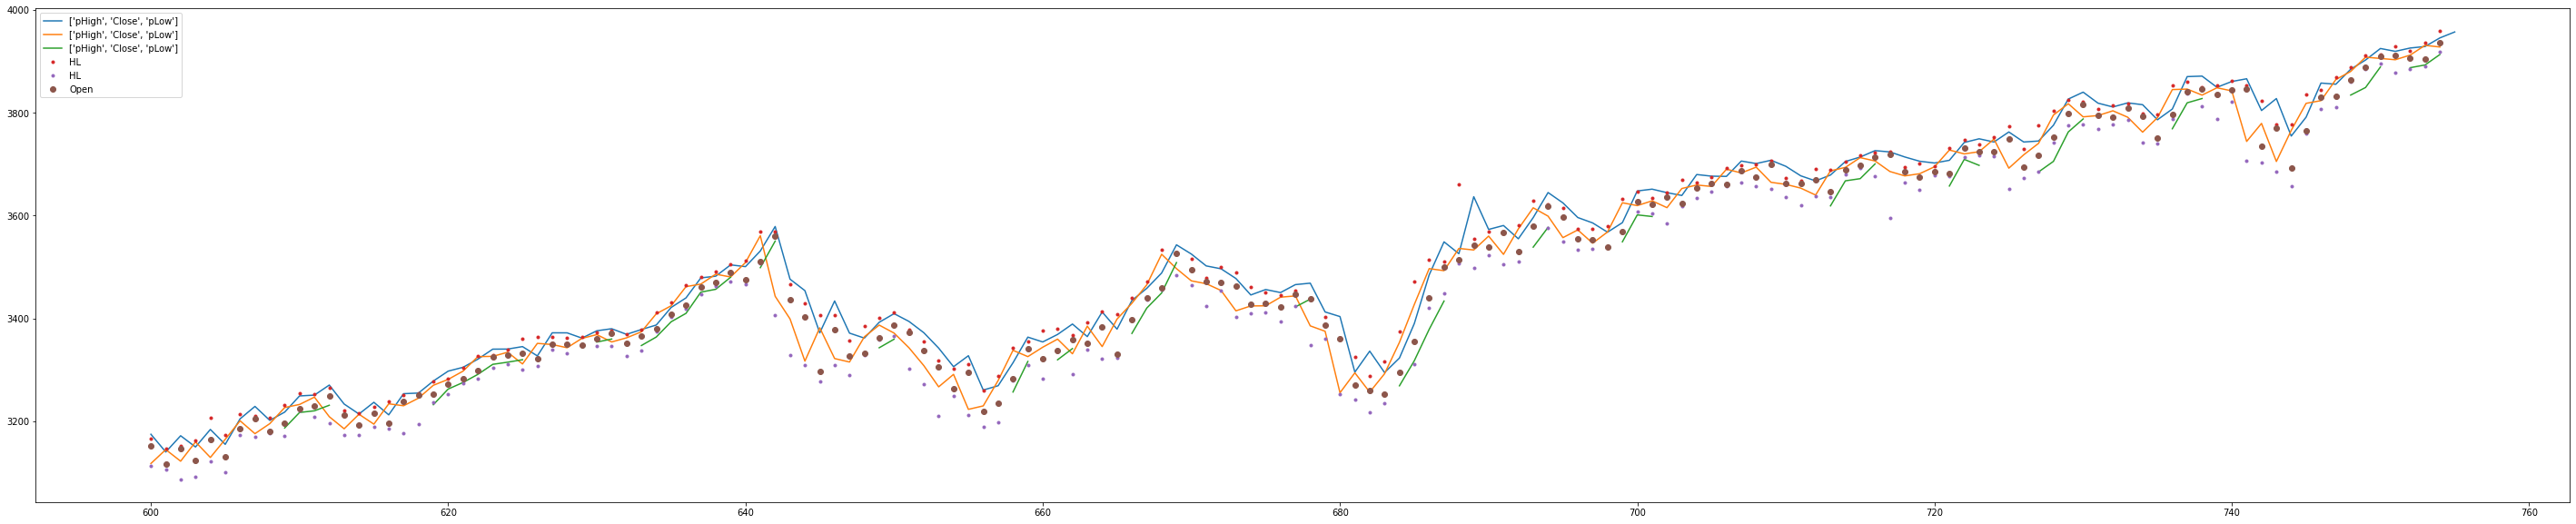

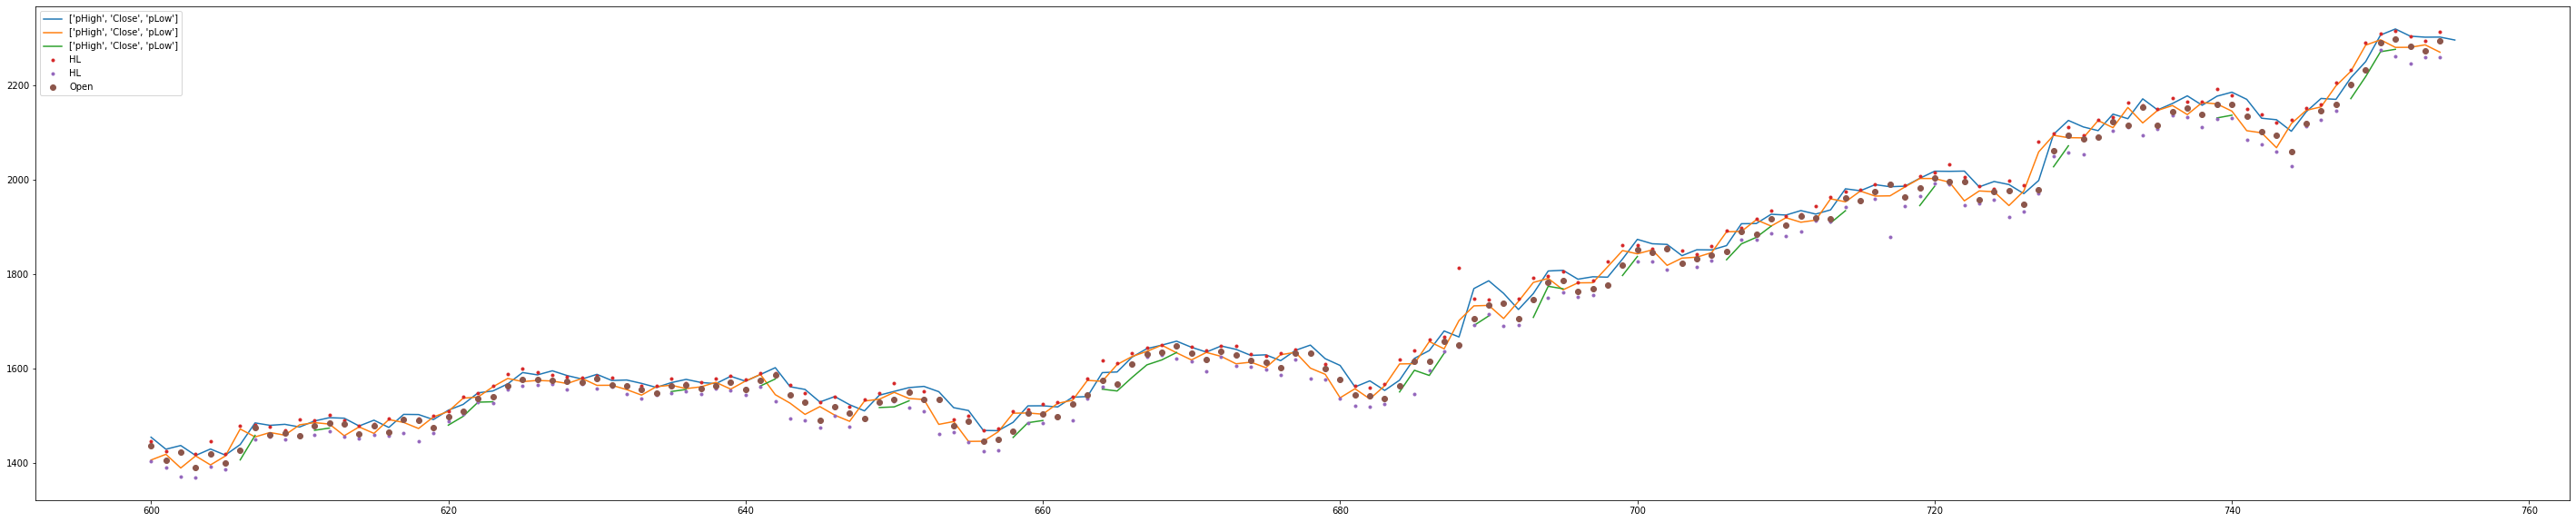

# selected:  0
  symbol  sharpe total  totalBH    pf nwin nloose tprofit tloss  lastp
0     ES  -0.227   128      nan 0.973  216    110     648  -666    nan
1     TF  -0.440    46      nan 0.945  190    101     570  -603    nan


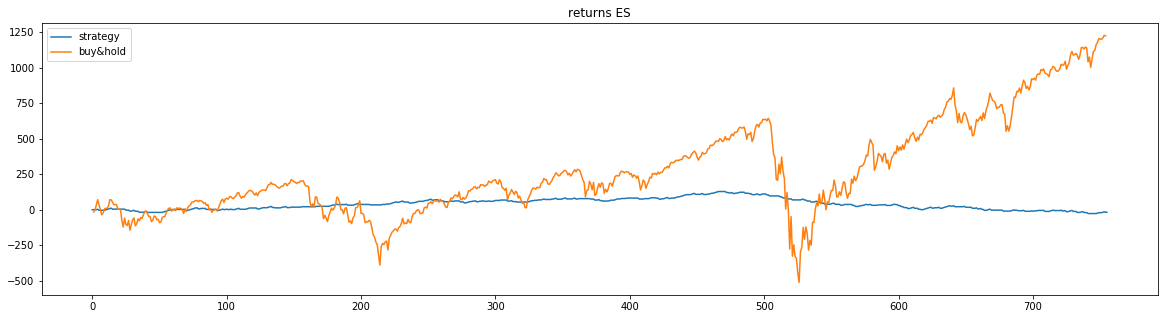

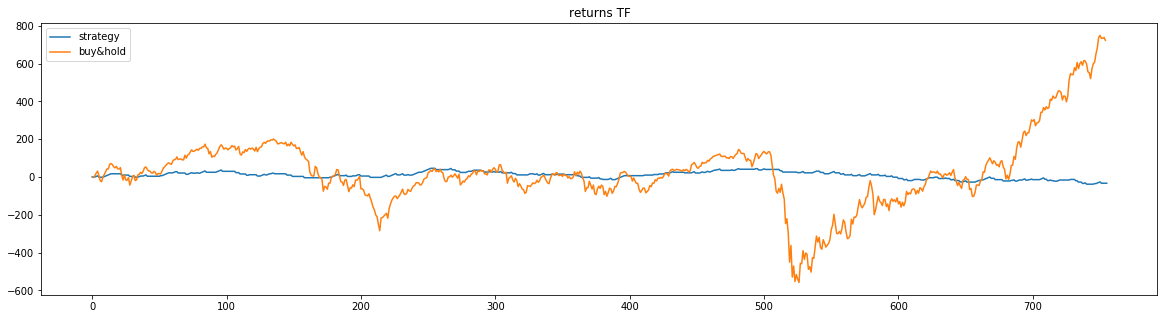

In [77]:
plot=True
n=0
strategy = pd.DataFrame()
strategyDaily = pd.DataFrame()
dayReturnPercent = pd.DataFrame()
buyHold= pd.DataFrame()
print(len(symbols))
pffilterlist={}
starSymbols1=[]
outSymbols1=[]
raw_stats=pd.DataFrame(columns=('symbol', 'sharpe', 'total','totalBH','pf','nwin','nloose','tprofit','tloss','lastp'))
#symbols = symbols[:100]
for s in symbols:
    i = folio[s]#.copy()
    i['pdHigh'] = i.pHigh-i.High
    i['pdLow'] = i.pLow-i.Low
    i['pdHighpct'] = i.pdHigh/i.High
    i['pdLowpct'] = i.pdLow/i.Low
    i['dd'] = i.pLow-i.Low
    i['pRange'] = i.pHigh-i.pLow
    i['nul'] = i.pHigh
    i.nul = 0
    i['returns'] = 3 #(i.Close-i.Open)
    i['returns'][i.Close<i.Open-3] = 0 #i.pHigh-i.Open #profit target
    i['returns'][i.Close<i.Open-6] = -3 #i.pHigh-i.Open #profit target
    i['returns'][i.Close<i.Open-10] = -7 #i.pHigh-i.Open #profit target
    #i['returns'][i.Close<i.pLow] = i.pLow-i.Open  #stoploss
    #i['returns'][i.Low<i.pLow] = i.pLow-i.Open  #stoploss
    i['returns'][i.Open>i.pHigh] = 0 #no trade
    #i['returns'][i.Open<i.pLow] = i.Close-i.Open
    #i['returns'] = i.Close[i.pHigh>i.High]-i.Open
    #i['returns'] = i.pHigh-i.Open
    #i['returns'] = (i.High.diff())
    #i['returns'] = (i.Close.diff())
    i['upRange'] = i.pHigh-i.Open
    i['dnRange'] = i.pLow-i.Open
    i['HiRange'] = i.High-i.Open
    i['LoRange'] = i.Low-i.Open
    
    #i[['HiRange','returns','upRange','LoRange','dnRange','nul']][500:].plot(figsize=(50,10),title="daily pRange")

    #i['returns'] = (i.High-i.Low.shift(1))
    #i['rvol'] = i.Volume/i.Volume.rolling(8).mean()
#    trades =   (i.pdLowpct > 0.0) & (i.lDiff > 0.0) #& (i.NI > 0.00) #& (i.Open <= i.pentry) # & (i.NI > 0.00)#  & & (i.rvol > 0.0)(i.NI > 0)  & & (i.ovGappct > 0.00) & (i.ovGappct < 0.04)
    #trades =   (i.pdHighpct > 0.0) &(i.mDiff > 0.0)& (i.NI > 0.00) #& (i.NI > 0.00) #& (i.Open <= i.pentry) # & (i.NI > 0.00)#  & & (i.rvol > 0.0)(i.NI > 0)  & & (i.ovGappct > 0.00) & (i.ovGappct < 0.04)
    #trades =  (i.pLow.diff() > 0.00) &(0.6*(i.pHigh-i.pLow)+i.pLow > i.Close.shift(1))
    trades = i.Low
    trades = np.NaN
    trades =  (i.pHigh.diff() > 0)  &(i.Open < i.pHigh-i.pRange/4)  &(i.nni.shift(1) > 0.00)# &(i.pHigh > i.Close.shift(1)) &(i.pLow>i.Low.shift(1))
    i['trades']=trades
    #print(trades.head(20))
    i['pLow'][~trades] = np.NaN
    #i[['pHigh','pLow','Open','High','Close','pLow','Low']][600:].plot(figsize=(50,10),title="predict: "+s)
    plt.figure(figsize=(50,10))#,title="predict: "+s
    wat = ['pHigh','Close','pLow']
    plt.plot(i[wat][600:],'-',label=wat)#, markevery=markers_on)
    
    plt.plot(i[['High','Low']][600:],'.',label='HL')#, markevery=markers_on)
    plt.plot(i[['Open']][600:],'o',label='Open')#, markevery=markers_on)
    plt.legend()
    plt.show()
    hcorr  =   (i.pHigh.diff() > 0.00) & (i.High.diff() > 0.00)#& (i.returns > 0.00)# & (i.High.diff() > 0.00)
    fhcorr =   (i.pHigh.diff() > 0.00) & (i.High.diff() < 0.00)#& (i.returns < 0.00)# & (i.High.diff() < 0.00)
    lcorr  =   (i.pLow.diff()  > 0.00) & (i.Low.diff()  > 0.00)#& (i.returns > 0.00)#
    flcorr =   (i.pLow.diff()  > 0.00) & (i.Low.diff()  < 0.00)#& (i.returns < 0.00)#& (i.Low.diff() < 0.00)
    #print(s,' high ',hcorr.sum(),' ',fhcorr.sum(),'correlation: ',hcorr.sum()/fhcorr.sum(), 'low ',lcorr.sum(),' ',flcorr.sum(),' correlation: ',lcorr.sum()/flcorr.sum())

    i['trades'] = trades
    dailyReturns = i.returns * trades
    i[s]=dailyReturns
    
    strategyDaily[s] = dailyReturns
    strategy[s]      = dailyReturns.cumsum()
    buyHold[s]       = i.Close.diff().cumsum()
    
    sharpe  = dailyReturns.mean()/dailyReturns.std()
    sharpe  = sharpe*(len(dailyReturns)**0.5) #annual
    total   = strategy[s].max() #dailyReturns.sum()
    totalBH = buyHold[s].iat[-1]
    nloose  = (dailyReturns <0).sum()
    nwin    = (dailyReturns >0).sum()
    tprofit = (dailyReturns*(dailyReturns >0)).sum()
    tloss   = (dailyReturns*(dailyReturns <0)).sum()
    lastp    = i.Low.iat[-1]
    pf=0
    if nloose != 0:
        pf = tprofit/abs(tloss)
    else:
        pf = 100
    row=[s,sharpe,total,totalBH,pf,nwin,nloose,tprofit,tloss,lastp]
    raw_stats.loc[n]=row
    n=n+1
#strategy[500:].plot(figsize=(50,10),title="cummulative returns")
#strategyDaily[500:].plot(figsize=(50,10),title="daily profits")
print('# selected: ',len(starSymbols1))
sh=raw_stats.sort_values(['sharpe','total'],ascending=False)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 11,'display.width',140):  # more options can be specified also
    print(sh)
n=0
if True:
    for x in sh['symbol']:
        if n<20:
            n=n+1
            plt.figure(figsize=(20,5))
            plt.title('returns '+x)
            plt.plot(strategy[x], label="strategy")
            plt.plot(buyHold[x], label="Buy&Hold")
            plt.legend(['strategy','buy&hold'])
            plt.show()
pd.option_context('display.max_rows', 100, 'display.max_columns', 26,'display.width',240)            
#folio[symbols[0]].tail(40)

In [70]:
#s=stats.sort_values(['nwin'],ascending=False)[:int(len(stats)/4)]
#s.symbol
stats=raw_stats.loc[(raw_stats.lastp<2000) & (raw_stats.lastp>5),:]
print(stats.lastp.mean())
stats.sort_values('lastp')


nan


,symbol,sharpe,total,totalBH,pf,nwin,nloose,tprofit,tloss,lastp


position per day #  0


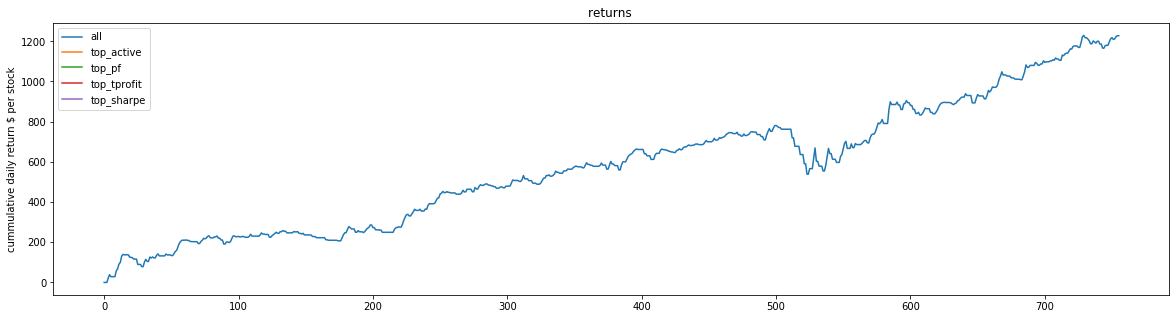

In [71]:
dailyReturn = pd.DataFrame()
days=[]
percentile =0.20
for x in range(0,len(strategy)):
    yst = strategyDaily.loc[x,:]
    #print(yst,yst.sum())
    row = len(dailyReturn)
    dailyReturn.loc[row,'all']=strategyDaily.loc[x,symbols].sum()/len(strategyDaily.columns)
    dailyReturn.loc[row,'top_active']=strategyDaily.loc[x,stats.sort_values(['nwin'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_pf']=strategyDaily.loc[x,stats.sort_values(['pf'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_tprofit']=strategyDaily.loc[x,stats.sort_values(['tprofit'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_sharpe']=strategyDaily.loc[x,stats.sort_values(['sharpe'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    #dailyReturn.loc[row,'bot_loss']=strategyDaily.loc[x,stats.sort_values(['tloss'],ascending=True)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
dailyReturn.fillna(0)
plt.figure(figsize=(20,5))
plt.title('returns ')
plt.plot(dailyReturn['all'].cumsum(), label="all")
#plt.plot(dailyReturn['stars'].cumsum(), label="stars")
plt.plot(dailyReturn['top_active'].cumsum(), label="top_active")
plt.plot(dailyReturn['top_pf'].cumsum(), label="top_pf")
plt.plot(dailyReturn['top_tprofit'].cumsum(), label="top_tprofit")
plt.plot(dailyReturn['top_sharpe'].cumsum(), label="top_sharpe")
#plt.plot(dailyReturn['bot_loss'].cumsum(), label="bot_loss")
plt.ylabel("cummulative daily return $ per stock")
plt.legend()
days
dailyReturn
print ('position per day # ',int(len(stats)*percentile))

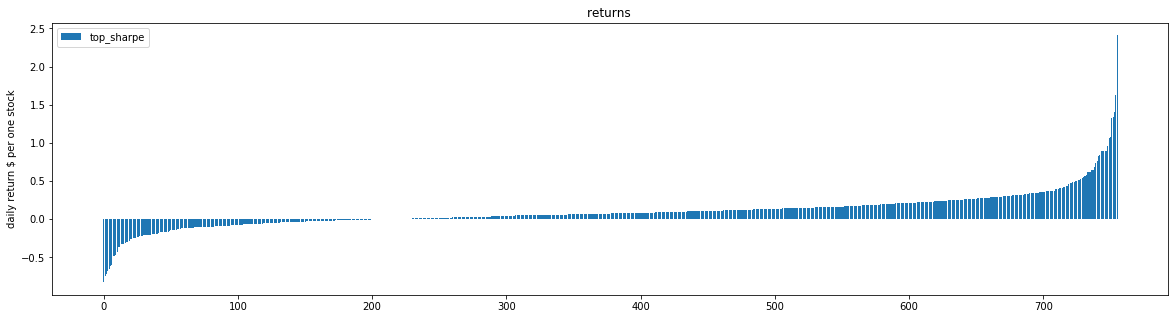

In [393]:
plt.figure(figsize=(20,5))
plt.title('returns ')

which = 'top_sharpe'
dv = dailyReturn.sort_values(which)[which].reset_index(drop=True)
plt.bar(dv.index,dv, label=which)
#plt.plot(dailyReturn['top_sharpe'], label="top_sharpe")
#plt.plot(dailyReturn['bot_loss'], label="bot_loss")
plt.ylabel("daily return $ per one stock")
plt.legend()


Index(['all', 'top_active', 'top_pf', 'top_tprofit', 'top_sharpe'], dtype='object')


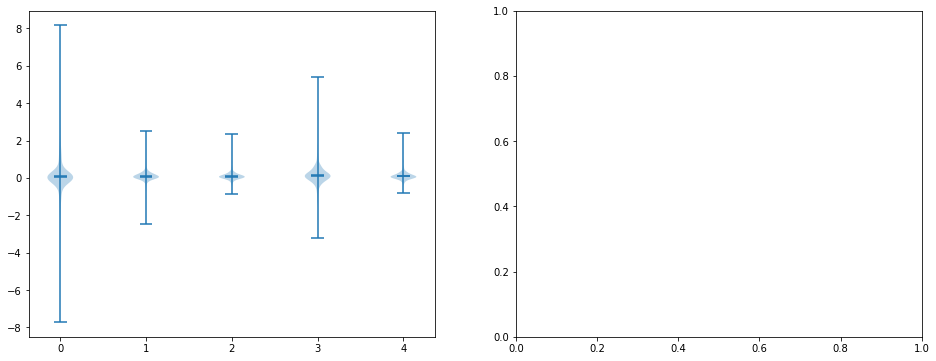

In [394]:
print(dailyReturn.columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax = axes[0].violinplot(dailyReturn.to_numpy(), range(0,len(dailyReturn.columns)), points=len(dailyReturn), widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)

In [395]:
goodboys = stats.sort_values(['sharpe'],ascending=False)[:int(len(stats)*percentile)].symbol.tolist()
print(len(goodboys))
print(goodboys)
%store goodboys

230
['MORN', 'STN', 'EXPD', 'ATGE', 'NSANY', 'BGNE', 'TEAM', 'WLTW', 'AEP', 'CBOE', 'TRI', 'CASY', 'QGEN', 'WAT', 'ARNA', 'NVCR', 'TAC', 'CREE', 'ZLAB', 'LXP', 'TDY', 'AEE', 'ATUSF', 'DKS', 'GIB', 'ARWR', 'MKTX', 'IAC', 'BKR', 'INFO', 'VRSK', 'WTRG', 'POOL', 'OGE', 'ZNGA', 'FAST', 'CZR', 'PCRX', 'AVD', 'EQC', 'CTXS', 'J', 'RBA', 'Z', 'DHR', 'ICLR', 'BIP', 'AUOTY', 'BX', 'CMO', 'OAS', 'JKHY', 'K', 'NDAQ', 'CAGDF', 'CNSWF', 'DLR', 'DISCA', 'LLY', 'ODP', 'WEC', 'PSA', 'SBAC', 'CCEP', 'ARNC', 'XENE', 'ODFL', 'CPRT', 'GL', 'CERN', 'MTZ', 'DUK', 'EW', 'ATO', 'PGR', 'ANGO', 'MDRX', 'RCUS', 'SIX', 'NEE', 'IDA', 'CAL', 'RGEN', 'NTIOF', 'FFIV', 'EPC', 'BKE', 'PAYC', 'GWW', 'POR', 'TECH', 'LNDC', 'LDOS', 'AON', 'TNDM', 'LPLA', 'AMED', 'SLGN', 'LYV', 'ACCO', 'XEL', 'BF-B', 'NLOK', 'SGMS', 'EVRG', 'VRSN', 'IBKR', 'CUBE', 'BIG', 'RARE', 'KIM', 'TD', 'ILMN', 'HQY', 'PG', 'XRAY', 'PKI', 'AIG', 'VGR', 'PNW', 'TROW', 'SO', 'STMP', 'IDXX', 'IHC', 'NI', 'AME', 'WMT', 'THS', 'KR', 'BECN', 'RMD', 'POST', 'C

In [396]:
a = stats.sort_values('total')
m = a.query('symbol in @goodboys')
len(m)

230

230

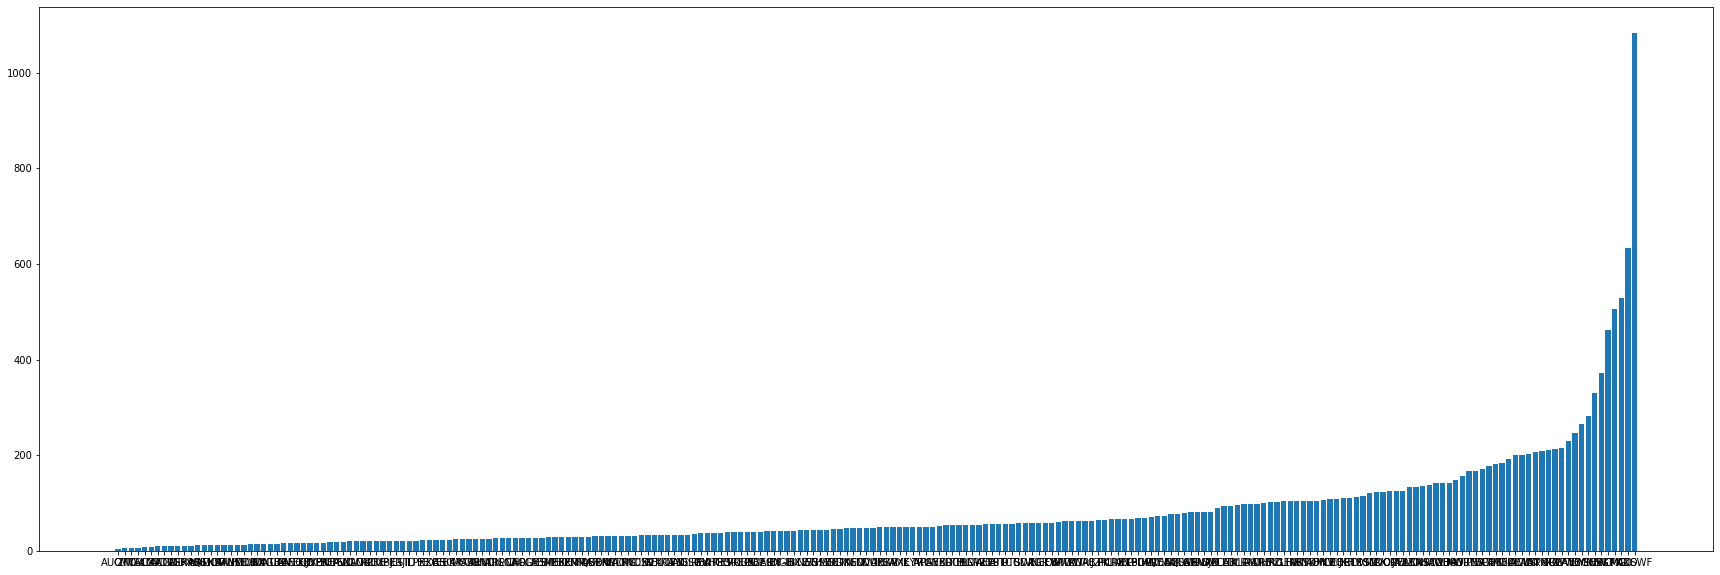

In [397]:

plt.figure(figsize=(30,10))
plt.bar(m.symbol,m.total)
#plt.legend(symbols)
m.columns.tolist()
len(m)

In [398]:
setup = m.symbol.tolist()
print(setup)

['AUOTY', 'CMO', 'ZNGA', 'TAC', 'SLM', 'LXP', 'CODI', 'ACCO', 'ATGFF', 'VGR', 'MDXG', 'HPQ', 'AES', 'LNDC', 'AMOV', 'KIM', 'NSANY', 'ATUSF', 'PWCDF', 'HTLD', 'MDRX', 'NI', 'MAT', 'CAGDF', 'NUAN', 'BCE', 'GNTX', 'ANGO', 'EQC', 'FEYE', 'JNPR', 'XENE', 'BEP', 'OTEX', 'AVD', 'SLGN', 'NLOK', 'ACGL', 'RCI', 'PFE', 'CUBE', 'XPER', 'JCI', 'SJI', 'TD', 'LPX', 'FE', 'EXC', 'OAS', 'BHC', 'EBAY', 'KR', 'MAS', 'STN', 'CIEN', 'ARNC', 'HAIN', 'TRP', 'DISCA', 'LNT', 'CAL', 'HRL', 'OGE', 'CMS', 'ABM', 'BIP', 'MET', 'BKE', 'BKR', 'PNM', 'EMRAF', 'FAST', 'QGEN', 'BRKR', 'ORCL', 'VIAC', 'WTRG', 'RY', 'YNDX', 'CCEP', 'SO', 'XEL', 'NTIOF', 'XRAY', 'GIS', 'AIG', 'YELP', 'DSGX', 'RBA', 'PWR', 'IHC', 'THS', 'POR', 'EVRG', 'RCUS', 'EPC', 'ODP', 'PCAR', 'BECN', 'SIX', 'BF-B', 'GIB', 'BX', 'ICE', 'NEE', 'WNS', 'SGMS', 'HSIC', 'BIG', 'CERN', 'DKS', 'INFO', 'CNC', 'DVA', 'DUK', 'GPC', 'IBKR', 'SWX', 'AME', 'K', 'LYV', 'TRI', 'ATGE', 'PAYX', 'SNBR', 'ED', 'LDOS', 'TEL', 'PG', 'PNW', 'CPRT', 'AEE', 'POST', 'ATO', 'PT

In [385]:
%store setup

Stored 'setup' (list)
